In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.stats.diagnostic import unitroot_adf
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [58]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            'Test Statistic', 'p-value', '#Lags Used',
            'Number of Observations Used'
        ])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    print(dfoutput)

In [59]:
full_df = pd.read_pickle("task2_df.pkl")
train_df = full_df[:'2016-10-17 23:40:00']
test_df = full_df['2016-10-18 00:00:00':]

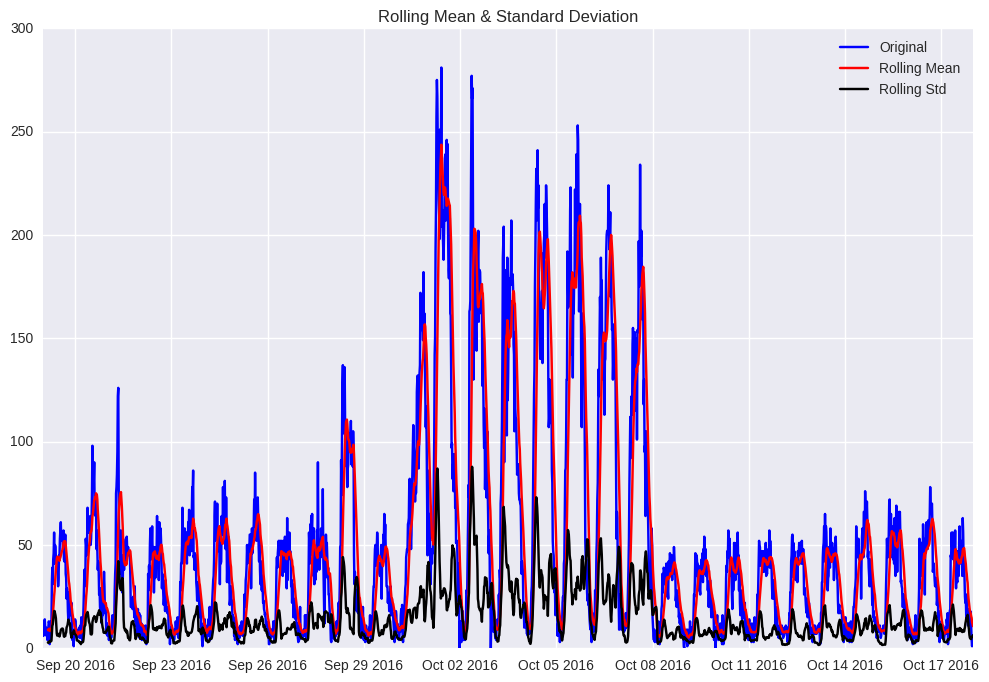

Test Statistic                -8.215135e+00
p-value                        6.655509e-13
#Lags Used                     2.000000e+01
Number of Observations Used    2.067000e+03
Critical Value (5%)           -2.862939e+00
Critical Value (10%)          -2.567515e+00
Critical Value (1%)           -3.433518e+00
dtype: float64


In [44]:
test_stationarity(train_df.T2D0)

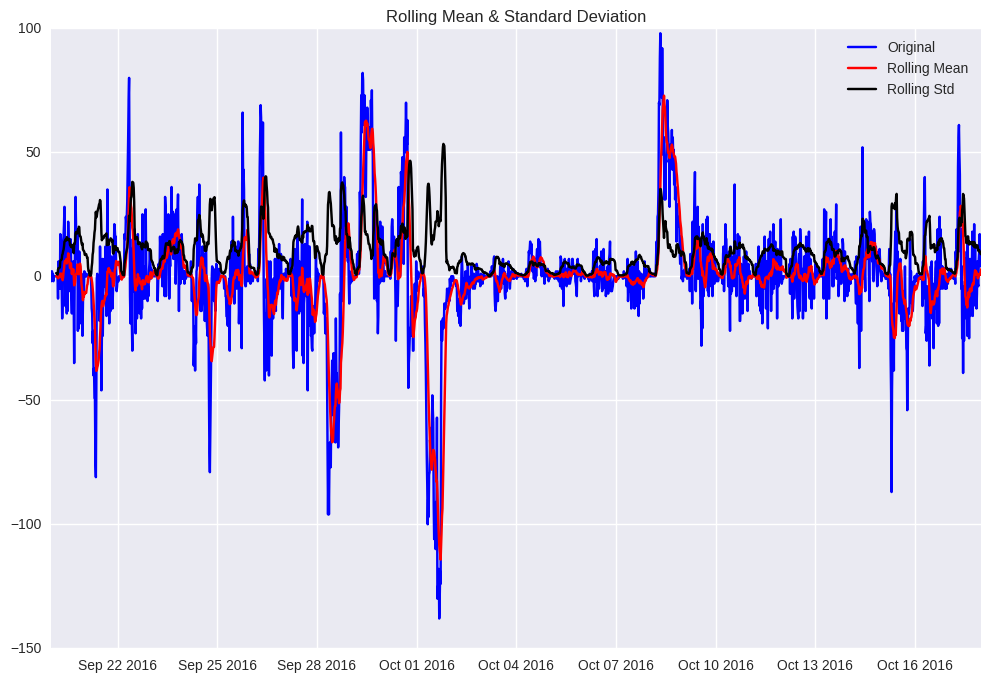

Test Statistic                -6.830450e+00
p-value                        1.899647e-09
#Lags Used                     1.000000e+01
Number of Observations Used    2.005000e+03
Critical Value (5%)           -2.862983e+00
Critical Value (10%)          -2.567538e+00
Critical Value (1%)           -3.433616e+00
dtype: float64


In [60]:
test_stationarity((train_df. T2D0.diff(72)).dropna())

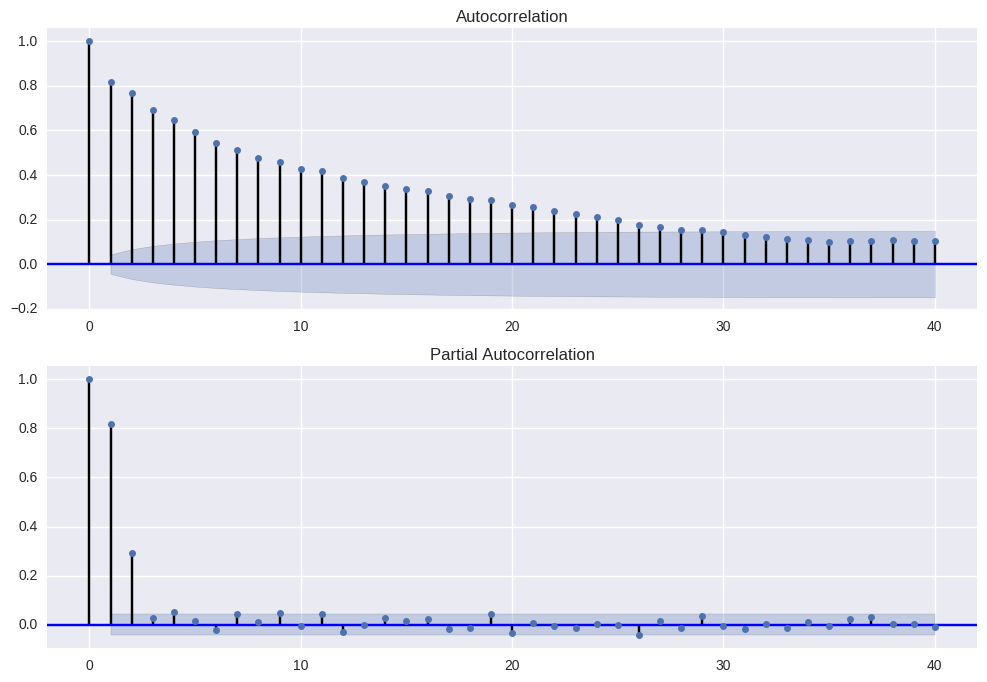

In [61]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    train_df. T2D0.diff(72).dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    train_df. T2D0.diff(72).dropna(), lags=40, ax=ax2)

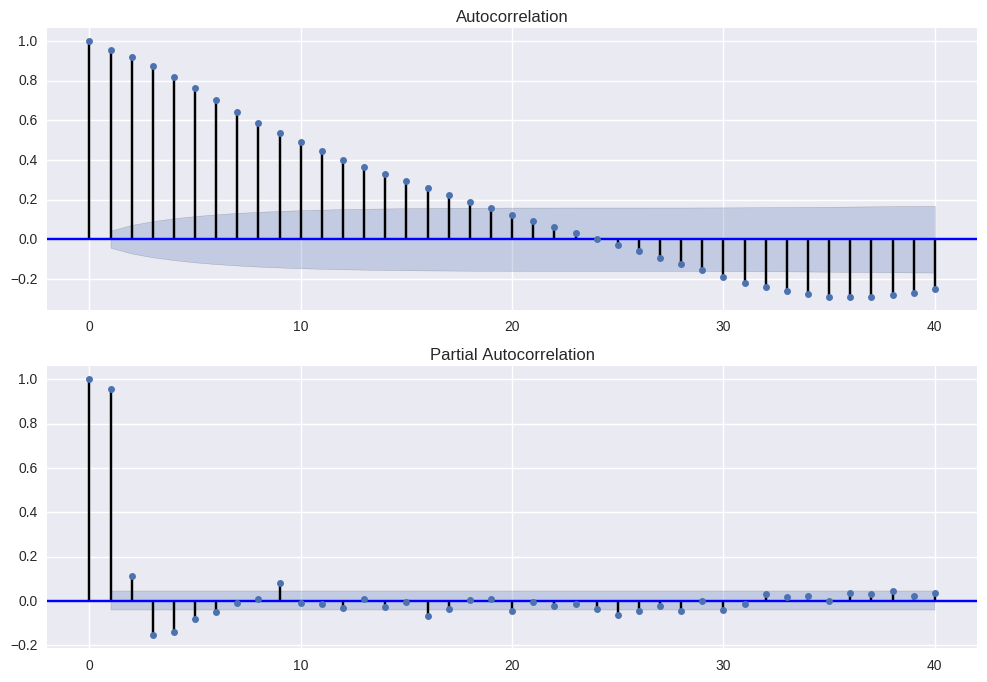

In [62]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.T2D0.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.T2D0.dropna(), lags=40, ax=ax2)